In [1]:

# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
from sklearn.datasets import load_digits
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import seaborn as sns

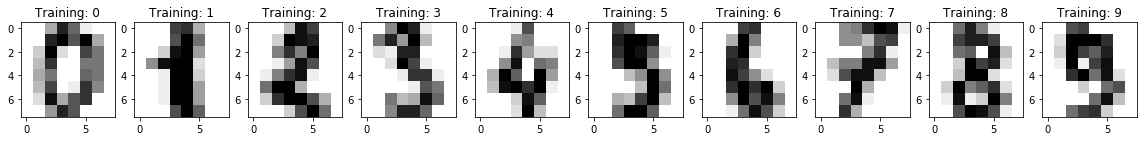

In [2]:
digits = load_digits()

# Plot some digits from the data-set.
plt.figure(figsize=(20, 5))
for i in range(0,10):
    ax = plt.subplot(1, 10, i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[i])
plt.show()

# To apply a classifier on this data, we need to flatten the image, to turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

In [3]:
parameters = {'weights':('uniform', 'distance'), 'n_neighbors':[1, 2, 3, 4, 5, 10, 15, 20]}
svc = KNeighborsClassifier()

clf = GridSearchCV(svc, parameters, cv=10, verbose=10, n_jobs=-1)
clf.fit(digits.data, digits.target)
#sorted(clf.cv_results_.keys())
print(clf.best_params_)
print(clf.best_score_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    5.3s


{'n_neighbors': 4, 'weights': 'distance'}
0.9788536449638287


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    5.8s finished


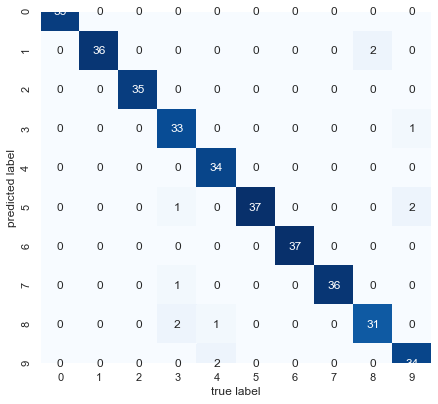

In [4]:
# Create an instance of Neighbours Classifier and fit the data with best k.
knc = KNeighborsClassifier(n_neighbors=4, weights='distance')
# Train the classifier.
knc.fit(x_train, y_train)
# Predict.
y_pred = knc.predict(x_test)

# Plot the confusion matrix.
fig = plt.figure(figsize=(7,7))
mat = confusion_matrix(y_test, y_pred)

sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1', '2', '3', '4', '5', '6', '7', '8', '9'], yticklabels=['0','1', '2', '3', '4', '5', '6', '7', '8', '9'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [6]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       0.97      0.89      0.93        37
           4       1.00      0.92      0.96        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.91      0.94      0.93        33
           9       0.94      0.92      0.93        37

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

